In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

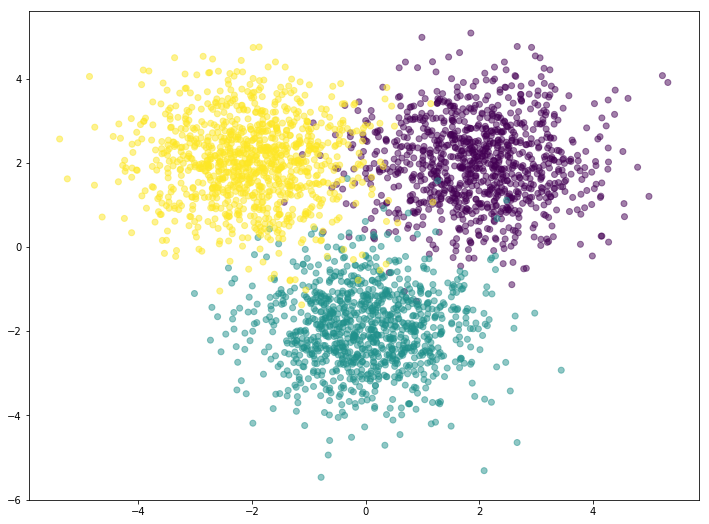

In [2]:
# Simulate the data

D = 2
K = 3
N = K * 1000

X0 = np.random.randn((N//K), D) + np.array([2, 2])
X1 = np.random.randn((N//K), D) + np.array([0, -2])
X2 = np.random.randn((N//K), D) + np.array([-2, 2])
X = np.vstack((X0, X1, X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (12, 9))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)

In [3]:
# Functions

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims = True)

def cross_entropy(Y, P):
    return -(1/N)*np.sum(Y*np.log(P))

def classification_rate(y, P):
    return np.mean(y == P.argmax(axis = 1))

In [5]:
# Data prep
# This is equivalent to One Hot Encoding the target variable

Y = np.zeros((N, K))

for i in range(N):
    Y[i, y[i]] = 1

In [5]:
# Build the model

PHI = np.column_stack((np.array([[1]*N]).T, X))
W = np.random.randn((D+1), K)

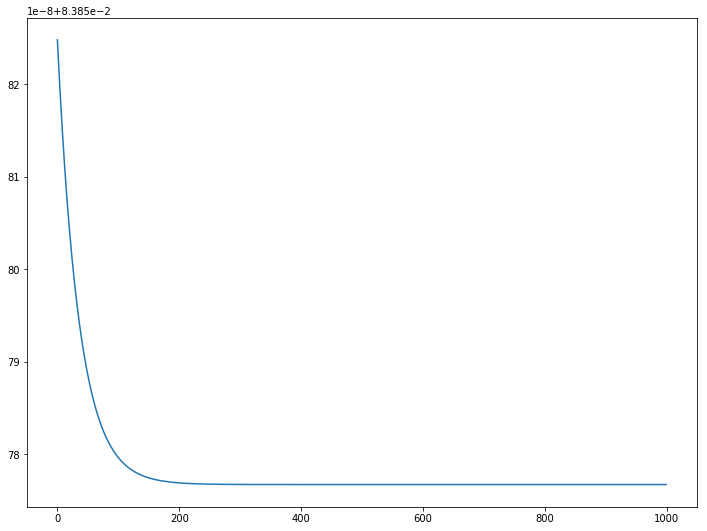

In [10]:
# Train the model

J = []
eta = 3
epochs = int(1e3)

for t in xrange(epochs):
    P = softmax(PHI.dot(W))
    J.append(cross_entropy(Y, P))
    W -= eta * (1/N) * PHI.T.dot(P-Y)
    
plt.figure(figsize = (12,9))
plt.plot(J)

In [11]:
# Report Classification Rate

print("Classification Rate: {}".format(classification_rate(y, P)))

Classification Rate: 0.971


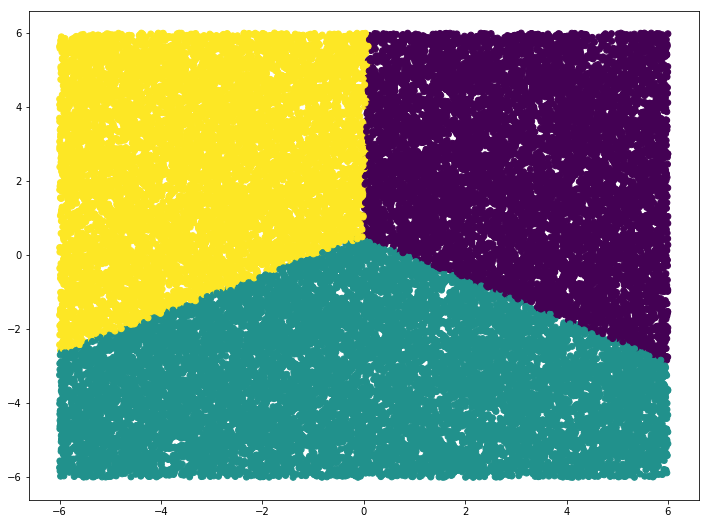

In [12]:
# Visualize Learned Decision Boundary

X_vis = np.random.uniform(-6, 6, (N*10, D))
X_vis = np.column_stack((np.array([[1]*(N*10)]).T, X_vis))

P_vis = softmax(X_vis.dot(W))

plt.figure(figsize = (12,9))
plt.scatter(X_vis[:,1], X_vis[:,2], c = P_vis.argmax(axis = 1))